<a href="https://colab.research.google.com/github/STYLO009/ANN_projects/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [39]:
df = pd.read_csv('health.csv')

In [40]:
df.shape

(5110, 12)

In [41]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [42]:
df.value_counts()

,,,,,,,,,,,,count
id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,
72940,Female,2.0,0,0,No,children,Urban,102.92,17.6,Unknown,0,1
77,Female,13.0,0,0,No,children,Rural,85.81,18.6,Unknown,0,1
84,Male,55.0,0,0,Yes,Private,Urban,89.17,31.5,never smoked,0,1
91,Female,42.0,0,0,No,Private,Urban,98.53,18.5,never smoked,0,1
99,Female,31.0,0,0,No,Private,Urban,108.89,52.3,Unknown,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
354,Female,65.0,0,0,Yes,Private,Urban,72.49,28.9,smokes,0,1
338,Female,43.0,0,0,Yes,Private,Rural,110.32,28.4,never smoked,0,1
321,Female,79.0,0,0,No,Self-employed,Rural,71.98,36.4,never smoked,0,1


In [43]:
df.dtypes

,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


In [44]:
df_cleaned = df.copy()

In [45]:
df_cleaned.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [46]:
df_cleaned.duplicated().sum()

np.int64(0)

In [47]:
df_cleaned['bmi'] = df_cleaned['bmi'].fillna(0)

In [48]:
df_cleaned.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [49]:
df_dummy = pd.get_dummies(df_cleaned,drop_first=True)

In [50]:
bool_columns = df_dummy.select_dtypes(include='bool').columns
df_dummy[bool_columns] = df_dummy[bool_columns].astype(int)

In [51]:
final = df_dummy.copy()

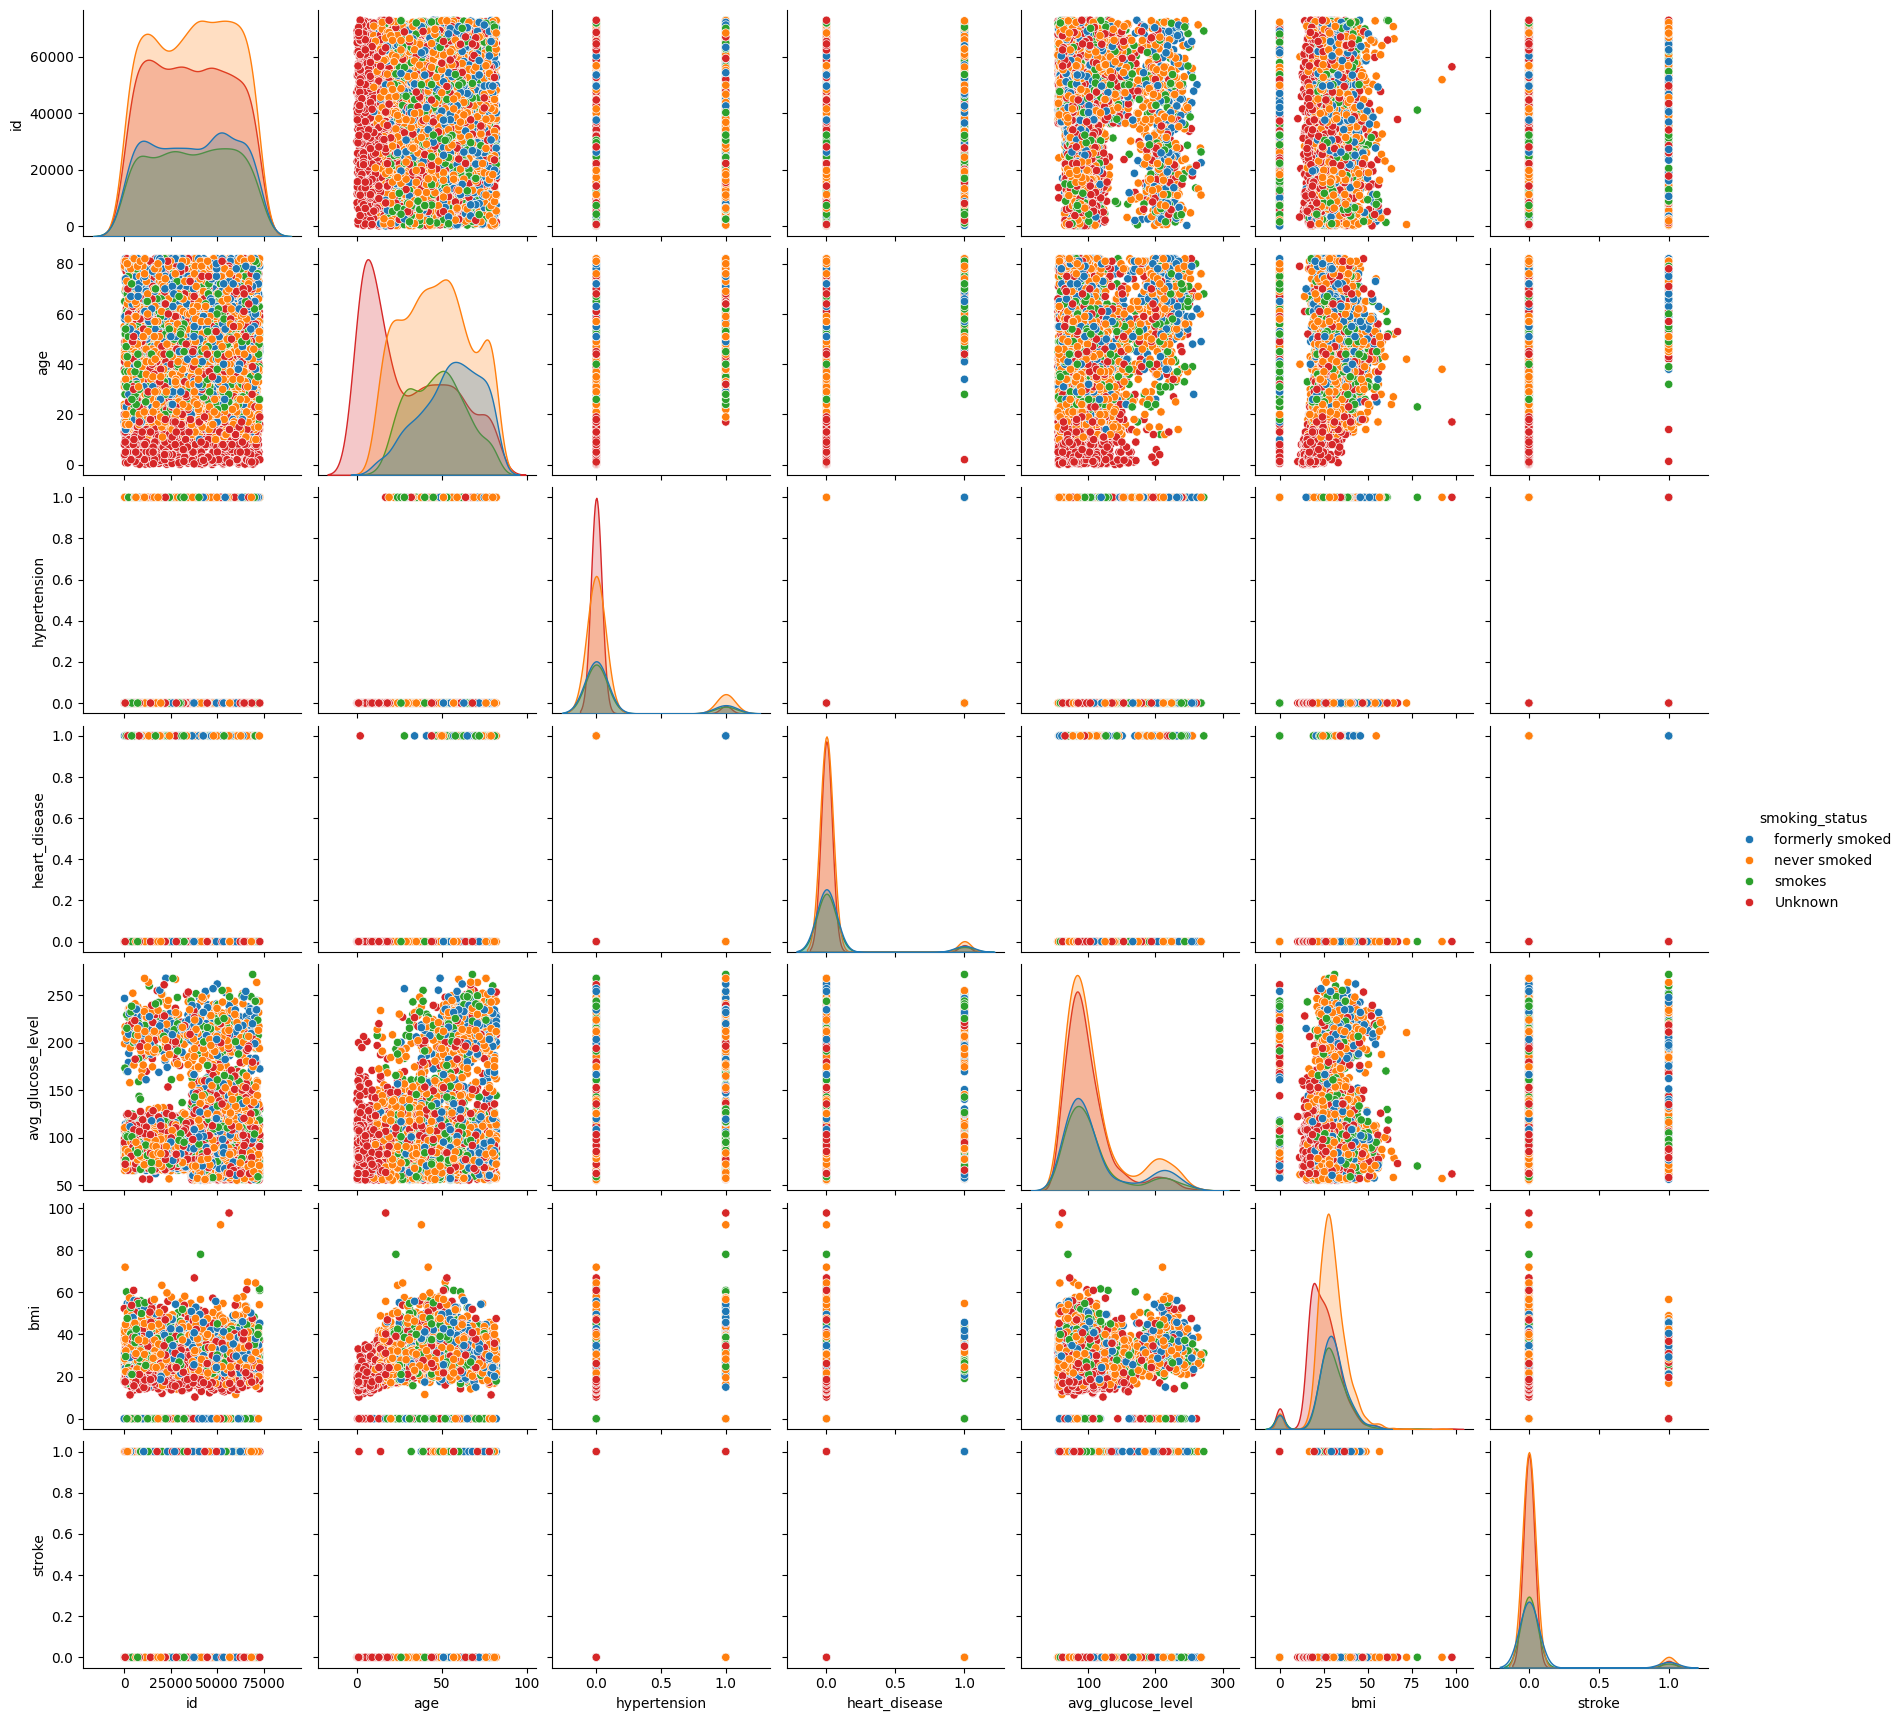

In [52]:
sns.pairplot(df_cleaned, hue = 'smoking_status')

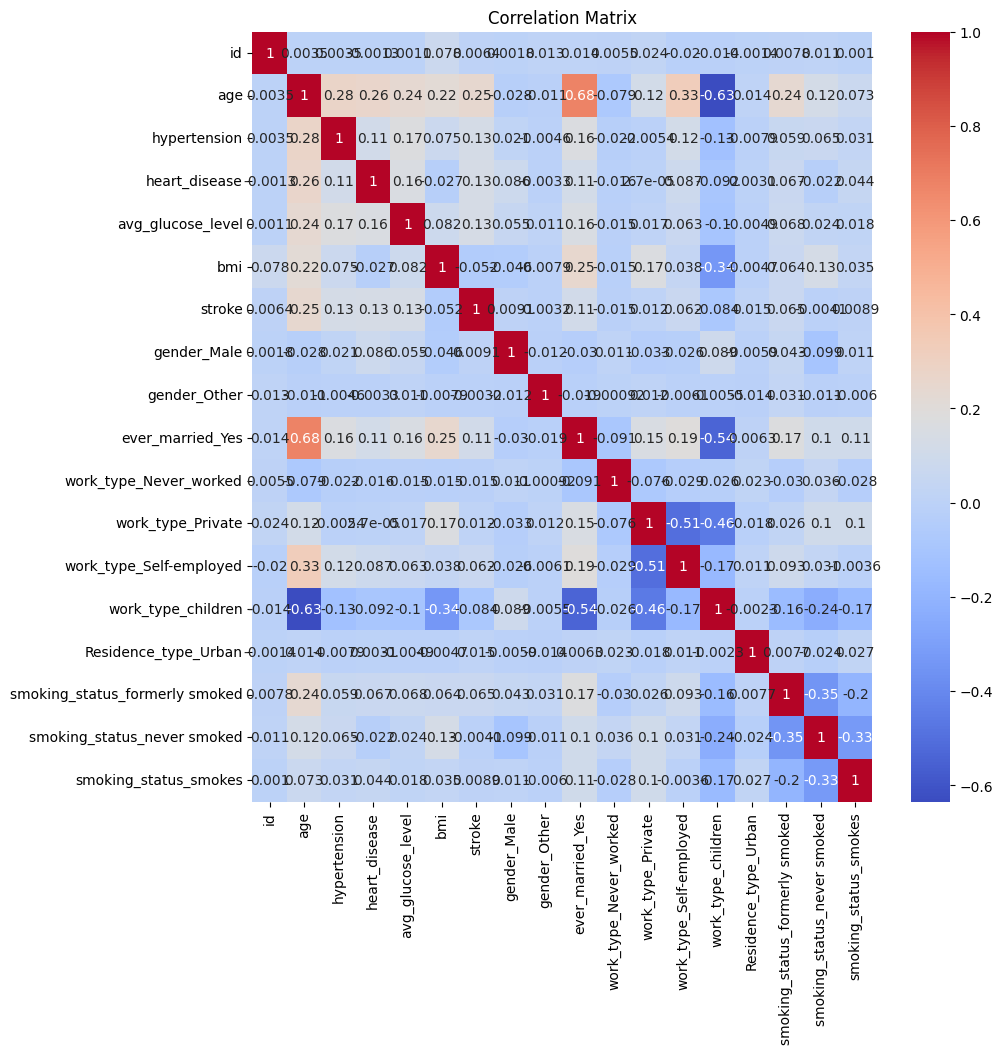

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(final.corr(), annot=True,cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

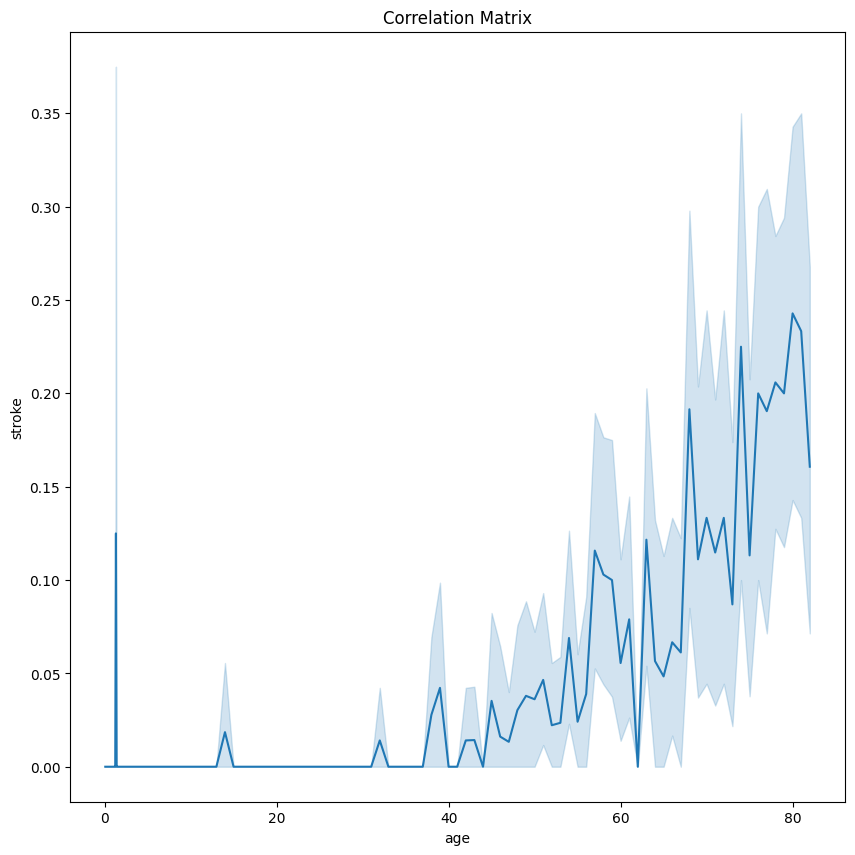

In [54]:
plt.figure(figsize=(10,10))
sns.lineplot(data=final, x='age', y='stroke')
plt.title('Correlation Matrix')
plt.show()

In [55]:
from sklearn.model_selection import train_test_split
X = final.drop(['stroke'],axis=1)
y = final['stroke']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression # Import LogisticRegression

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"{name}:")
    print(f"  Accuracy: {acc:.3f}")
    print(f"  Classification Report:\n{classification_report(y_test, y_pred)}")
    print("-" * 60)

Logistic Regression:
  Accuracy: 0.938
  Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

------------------------------------------------------------
K-Nearest Neighbors:
  Accuracy: 0.939
  Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022

------------------------------------------------------------
Support Vector Machine:
  Accuracy: 0.939
  Classification Report:
              precision    re

In [61]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import Perceptron
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical

In [58]:
per = Perceptron(max_iter=1000, random_state=42)
per.fit(X_train, y_train)
y_pred = per.predict(X_test)

In [59]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [60]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

-0.23629032258064564

In [67]:
y_train_cat = to_categorical(y_train,num_classes=2)
y_test_cat = to_categorical(y_test,num_classes=2)

In [69]:
tf.keras.backend.clear_session()
model_dl = Sequential([
    Dense(16,input_dim=X_train.shape[1],activation='relu'),
    Dense(8,activation='relu'),
    Dense(2,activation='softmax')
])

In [70]:
model_dl.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [71]:
history = model_dl.fit(X_train,y_train_cat,epochs=100,batch_size=32,validation_split=0.2,verbose=1)

Epoch 1/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9555 - loss: 611.0596 - val_accuracy: 0.9548 - val_loss: 222.4780
Epoch 2/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9548 - loss: 157.6463 - val_accuracy: 0.9535 - val_loss: 26.4394
Epoch 3/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9493 - loss: 23.0549 - val_accuracy: 0.9535 - val_loss: 7.5775
Epoch 4/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9515 - loss: 5.1668 - val_accuracy: 0.9108 - val_loss: 0.3511
Epoch 5/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9465 - loss: 0.3078 - val_accuracy: 0.9535 - val_loss: 0.2825
Epoch 6/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9527 - loss: 0.3084 - val_accuracy: 0.9535 - val_loss: 0.2962
Epoch 7/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9458 - loss: 0.3157 - val_accuracy: 0.9523 - val_loss: 0.4222
Epoch 8/100
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9422 - loss: 0.3310 - 

In [72]:
loss,accuracy = model_dl.evaluate(X_test,y_test_cat,verbose=1)
print(accuracy)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9391 - loss: 0.2479
0.9373776912689209


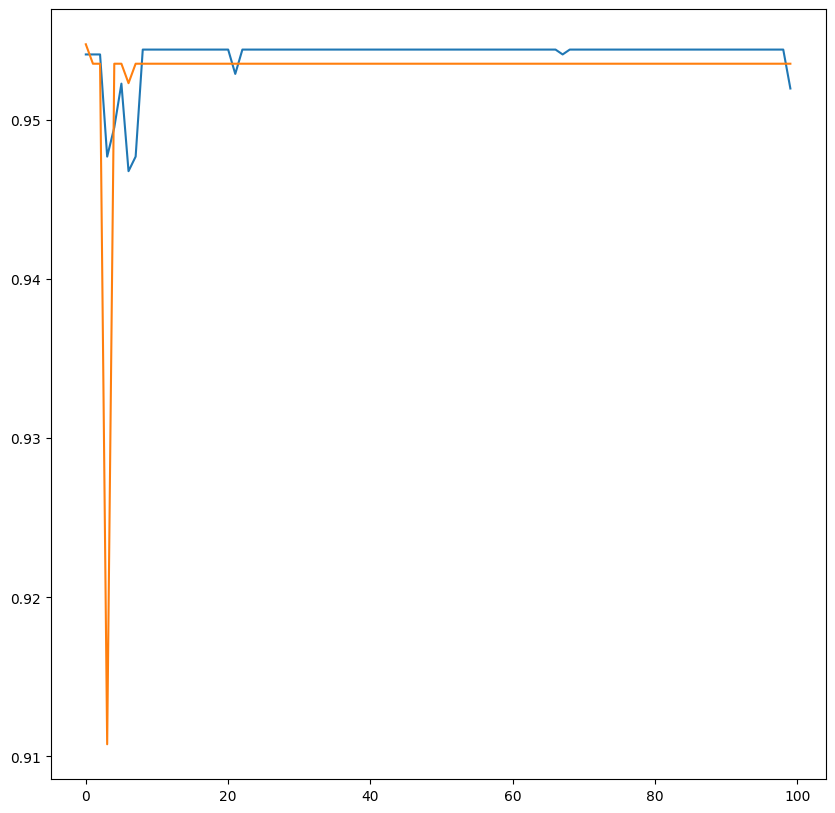

In [74]:
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'],label='train Acc')
plt.plot(history.history['val_accuracy'],label='val Acc')